In [1]:
import os
import pickle

import numpy as np
import pandas as pd

from scipy.io import readsav

import matplotlib.pyplot as plt
import matplotlib.dates as date
from datetime import datetime
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cmasher as cmr

In [2]:
import scienceplots
plt.rcParams.update({'font.size': 16})
plt.style.use(['bright'])
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Avenir']

Import Si IV data

In [3]:
pickle_file = 'siiv_spectra.pkl'

with open(pickle_file, 'rb') as f:
        loaded_data = pickle.load(f)

dat = loaded_data['dat']
wvl = loaded_data['wvl']
err = loaded_data['err']
arcsec = loaded_data['arcsec']
t_iris = loaded_data['t_iris']
time_iris = loaded_data['time_iris']
tm_iris = loaded_data['tm_iris']

narrow wavelength range to limit unrelated signals

In [4]:
siiv_cen =1402.77

x1,x2 = 1402.25,1404.25 
wvl_lim, = np.where((wvl >= x1) & (wvl <= x2))
lam = wvl[wvl_lim]
siiv = dat[:,:,wvl_lim]
siiv_err = err[:,:,wvl_lim]

select pixel of interest (index)

In [5]:
px = 141

In [6]:
from fit6 import gaussian, fit6, plot_fit_results

quick plot of the max intensity over the POI, then select a time index to fit

b'2023-05-03T09:25:38.725'


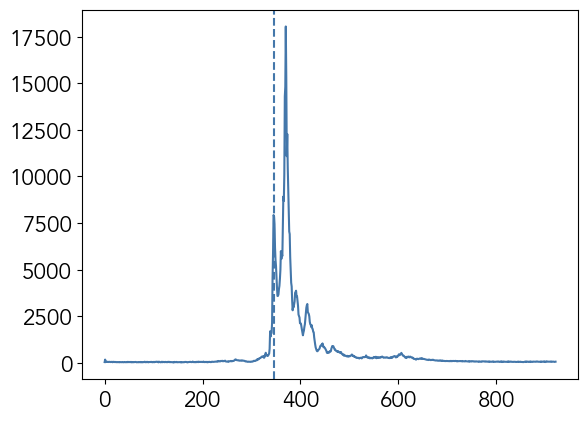

In [7]:
siiv_max = np.max(siiv, axis=2)
peak_slice = siiv_max[px]
plt.plot(peak_slice)

tm = 346 # 346
plt.axvline(tm,linestyle='dashed')
print(time_iris[tm])

fit

In [8]:
result = fit6(tm, px, lam, siiv, siiv_err)

and plot

Gaussians used in best fit: [1, 2, 3, 4, 5, 6]


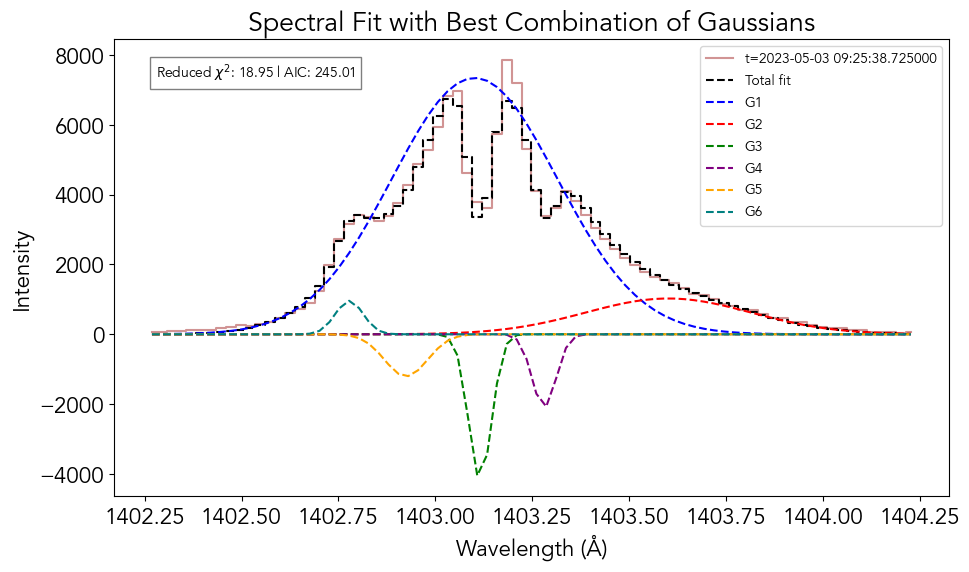

In [9]:
if result is not None:
    fit_res = result.best_values
    spec = siiv[px, tm]
    
    fig, ax = plot_fit_results(tm, px, lam, siiv, time_iris, result)
    plt.show()